In [1]:
import cv2
import cv
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as skio
from sklearn.cluster import k_means
from sklearn.decomposition import PCA
from scipy.fftpack import dct
from sklearn import preprocessing
from sklearn.svm import SVC
from featurizer import Featurizer,convert_lab
from colorizer import Colorizer
%matplotlib inline  

In [2]:
test_image = skio.imread("images/puppy6.jpg")
training_images = ["images/puppy4.jpg"]

In [3]:
def get_grayscale(image):
    gray = cv2.cvtColor(image, cv.CV_RGB2GRAY)
    return cv2.merge((gray,gray,gray))

def select_hyperparams(k,pc,actual_image):
    #getting the right featurizer
    f = Featurizer(training_images,k=k,pca_size=pc,num_samples=20000)
    f.compute_k_means()
    print "Getting features..."
    f.compute_features()
    #getting the right colorizer
    colorizer = Colorizer(f)
    print "Starting Training of SVMs..."
    colorizer.train()
    #running the experiment
    print "Colorizing Image..."
    gray_test = get_grayscale(actual_image)
    colored_image = colorizer.color_image(gray_test)
    print "K: " + str(k)
    print "PCA Size: " + str(pc)    
    print "********************************"
    skio.imshow(colored_image)
    skio.show()

In [4]:
windowSizes = [5,10,20]
gamma = [1.0/32,1.0/64,1.0/16]
c = [.5,1.5]
#k= [10,15,25]
k = [32,64]
pc = [32,64]

In [ ]:
%matplotlib inline  
for k_i in k:
    for p_i in pc:
        select_hyperparams(k_i,p_i,test_image)

Cluster Centers...
[[ 128.75337655  135.62641815]
 [ 128.37631158  125.57727192]
 [ 124.65223214  120.90267857]
 [ 129.52840336  129.84302521]
 [ 126.52947598  113.3569869 ]
 [ 129.35866261  139.80775076]
 [ 120.0521327   134.99526066]
 [ 127.27751004  133.36827309]
 [ 128.80412979  120.83834808]
 [ 124.24039939  125.66820276]
 [ 126.65961306  128.32648126]
 [ 130.08773292  143.07686335]
 [ 126.3343574   135.29697901]
 [ 125.74339623  118.73349057]
 [ 131.68137255  135.31470588]
 [ 127.67722556  138.06198798]
 [ 126.01618123  123.23247033]
 [ 130.71761364  137.63352273]
 [ 128.          129.34312902]
 [ 120.0751073   129.84334764]
 [ 127.22527855  117.5954039 ]
 [ 116.00763359  141.02290076]
 [ 127.95437796  127.31391472]
 [ 126.43859649  140.41447368]
 [ 128.57800732  131.49214547]
 [ 131.76226415  140.26792453]
 [ 126.68021201  130.89010601]
 [ 121.4345679   124.95061728]
 [ 128.92791411  123.57668712]
 [ 129.21755545  127.55403492]
 [ 123.0910725   122.2654284 ]
 [ 129.76655223  133

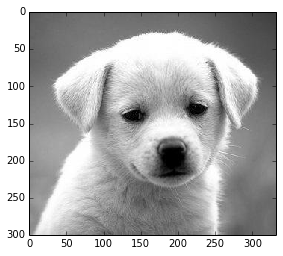

In [12]:
skio.imshow(test_image)
skio.show()